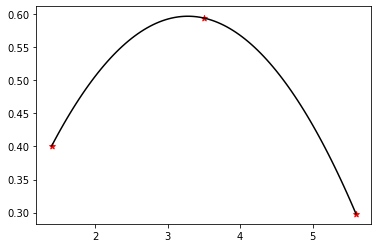

In [14]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'
filename = 'Parabolico.csv'
urllib.request.urlretrieve(url, filename)
Data = pd.read_csv(url)

X = np.float64(Data.X)
Y = np.float64(Data.Y)

def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

x = np.linspace(X[0],X[-1],100)
y = Interpolate(x,X,Y)

plt.scatter(X,Y,marker='*',color='r')
plt.plot(x,y,color='k')

In [55]:
x = sym.Symbol('x',real=True)
f = Interpolate(x,X,Y)
f = sym.simplify(f)

pol = sym.Poly(f)
coeficientes = pol.coeffs()

$y=(tanθ)x−[\frac{g}{2(v_0cosθ)^2}]x^2$

$y=ax+bx^2$

-------------------

$a =(tanθ)$

$θ = tan^-1 (a)$

------------------

$b = (\frac{g}{2(v_0cosθ)^2})$

$v_o = \sqrt\frac{g}{2(bcos^2θ)}$

In [67]:
a = coeficientes[1]
b = coeficientes[0]
g = -9.8
θ = (np.arctan(float(a)))
v_o = round(np.sqrt(g/(2*float(b)*((np.cos(θ))**2))))
θgrados = round(np.degrees(θ))
v_o, θgrados

(10, 20)